# Text Analysis on Great Expectations Novel

### Imports- **Run First**

In [1]:
#Bring in text file with our novel
textfile = open('great_expectations.txt', 'r', encoding = "utf8")
great_expect = textfile.read()


In [2]:
#Import libraries
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

import pandas as pd
from PIL import Image
import numpy as np
import random
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Data cleaning to split data into sentences
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

text = " " + great_expect + "  "
text = text.replace("\n"," ")
text = re.sub(prefixes,"\\1<prd>",text)
text = re.sub(websites,"<prd>\\1",text)
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
if "..." in text: text = text.replace("...","<prd><prd><prd>")
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>")
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")
text = text.replace("<prd>",".")
sentences = text.split("<stop>")
sentences = [s.strip() for s in sentences]
sentences = pd.DataFrame(sentences)
sentences.columns = ['sentence']

In [4]:
#Remove the first few rows of text that are irrelevant for analysis
sentences.drop(sentences.index[:59], inplace=True)
sentences = sentences.reset_index(drop=True)
sentences.head(10)

,sentence
0,[Illustration] Chapter I. My father’s fa...
1,"So, I called myself Pip, and came to be called..."
2,"I give Pirrip as my father’s family name, on t..."
3,"As I never saw my father or my mother, and nev..."
4,"The shape of the letters on my father’s, gave ..."
5,From the character and turn of the inscription...
6,"To five little stone lozenges, each about a fo..."
7,"Ours was the marsh country, down by the river,..."
8,My first most vivid and broad impression of th...
9,At such a time I found out for certain that th...


In [5]:
#convert sentence data to list
data = sentences['sentence'].values.tolist()
type(data)

list

In [6]:
#Text cleaning and tokenization using function
def text_processing(texts):
    #Remove numbers and alphanumerical words we don't need
    texts =  [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    #Tokenize & lowercase each word
    texts = [[word for word in text.lower().split()] for text in texts]
    #Stem each word
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text] for text in texts]
    #Remove stopwords
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]
    #Remove short words less than 3 letters in length
    texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]
    return texts

In [7]:
#Apply function to process data and convert to dictionary
data = text_processing(data)
dictionary = Dictionary(data)
len(dictionary)

9740

In [8]:
#Create corpus for LDA analysis
corpus = [dictionary.doc2bow(text) for text in data]
len(corpus)

9979

### How to perform topic modeling

-4.984662897641509
-5.250375826175895
-5.800019607177095
-6.505412042269931
-7.372759540523293
-7.921236444019666
-8.088976361449095


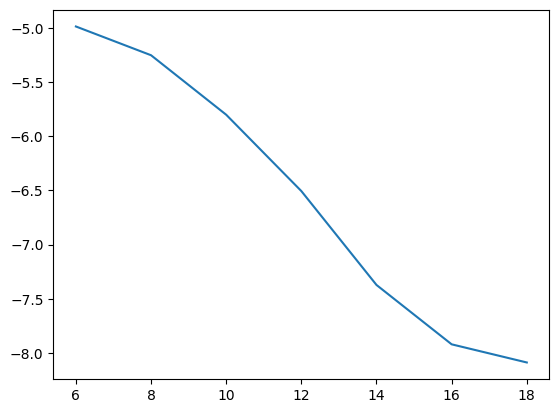

In [9]:
#Find optimal k value for the number of topics for our LDA analysis
np.random.seed(1)
k_range = range(6, 20, 2)
scores = []
for k in k_range:
    LdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=LdaModel, corpus=corpus, dictionary=dictionary, coherence="u_mass")
    print(cm.get_coherence())
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)


In [10]:
#Build LDA topic model
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=6, passes=20)

In [11]:
#Print topic distribution
model.show_topics()

[(0,
  '0.023*"miss" + 0.022*"joe" + 0.021*"pip" + 0.019*"havisham" + 0.019*"said" + 0.017*"come" + 0.013*"good" + 0.013*"old" + 0.011*"tell" + 0.009*"man"'),
 (1,
  '0.009*"time" + 0.008*"face" + 0.007*"little" + 0.007*"two" + 0.007*"looked" + 0.006*"could" + 0.006*"one" + 0.006*"saw" + 0.005*"old" + 0.005*"never"'),
 (2,
  '0.017*"yes" + 0.013*"gutenberg" + 0.011*"project" + 0.009*"one" + 0.008*"sir" + 0.006*"london" + 0.006*"hand" + 0.006*"jagger" + 0.006*"wemmick" + 0.006*"understand"'),
 (3,
  '0.015*"well" + 0.015*"would" + 0.012*"could" + 0.011*"said" + 0.010*"think" + 0.010*"done" + 0.010*"joe" + 0.007*"ever" + 0.007*"might" + 0.007*"must"'),
 (4,
  '0.046*"said" + 0.017*"know" + 0.014*"wemmick" + 0.013*"dear" + 0.012*"herbert" + 0.012*"would" + 0.011*"jagger" + 0.010*"say" + 0.010*"estella" + 0.010*"look"'),
 (5,
  '0.014*"hand" + 0.011*"work" + 0.009*"took" + 0.009*"went" + 0.008*"table" + 0.008*"upon" + 0.008*"little" + 0.007*"room" + 0.007*"put" + 0.006*"round"')]